<a href="https://colab.research.google.com/github/matheusbarroso/image_processing_with_python/blob/master/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Hands-On Image Processing with Python](https://www.packtpub.com/big-data-and-business-intelligence/hands-image-processing-python) 
[Matheus de Vasoncellos Barroso](https://github.com/matheusbarroso/image_processing_with_python) Solutions - 11/07/2020
## Chapter 3: Convolution and Frequency Domain Filtering

### Remarks
- Convolution theorem:
  - $f(x,y)*h(x,y)\Leftrightarrow F(u,v)H(u,v)$, where $*$ is the convolution operator and lower case functions in the image domain and upper case in the frequency domain.

Questions:
### 1. Plot the frequency spectrum of an image, a Gaussian kernel, and the image obtained after convolution in the frequency domain, in 3D (the output should be like the surfaces shown in the sections) using `mpl_toolkis.plot3d` module. (Hint: the `np.meshgrid() function will come in handy for the `surface` plot). Repeat the exercise for the inverse filter too.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import scipy.fftpack as fp
from scipy import signal, ndimage

In [2]:
lena_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

In [3]:
lena = rgb2gray(imread(lena_url))

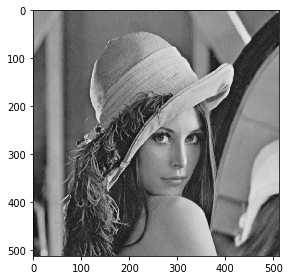

In [4]:
imshow(lena, cmap='gray')

First, we can conver the image to its frequency spectrum by applying a Fourier Transform to the image:

In [5]:
freq = fp.fft2(lena)

For the plot we need to create a mesgrid:

In [6]:
ny, nx = lena.shape[:2]
y = np.arange(ny)
x = np.arange(nx)
xv, yv = np.meshgrid(x, y)


As the frequencies are mapped to high values we can apply a logarithmic transformation to smooth its range of values:

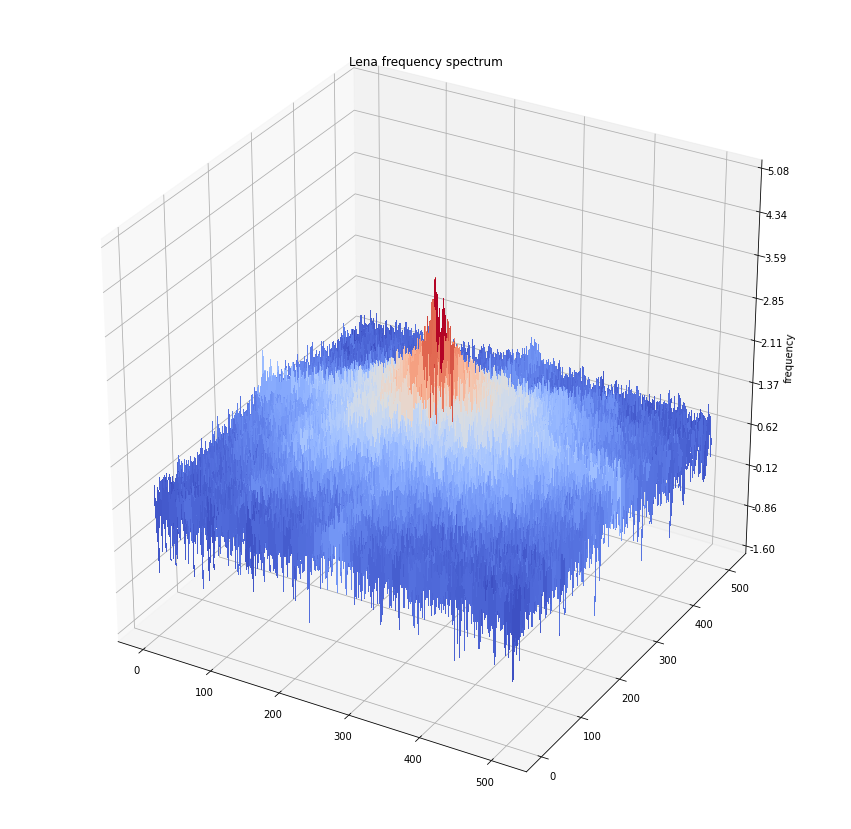

In [7]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
zv = np.log10(fp.fftshift(freq)).real
surf = ax.plot_surface(xv, yv, zv, linewidth=0, antialiased=False, cmap='coolwarm')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('frequency', size=10)
plt.title('Lena frequency spectrum'); 

Now, for the gaussian kernel:


In [8]:
gauss_kernel = np.outer(signal.gaussian(lena.shape[0], 1), signal.gaussian(lena.shape[1], 1))

In [9]:
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))

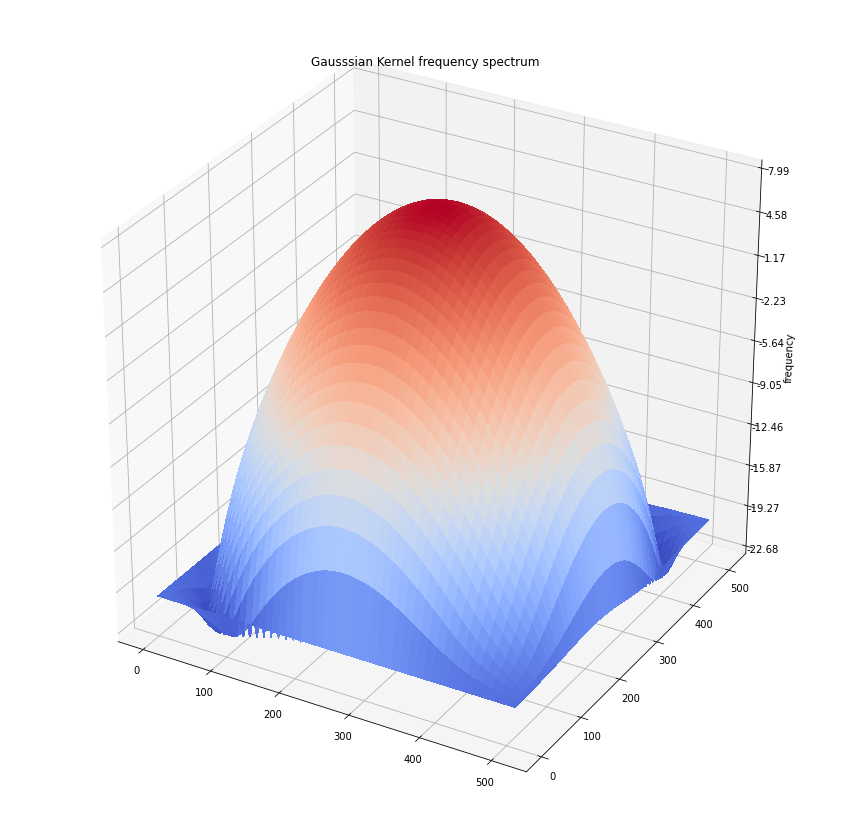

In [10]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
zv = 10 * np.log10(0.01 + fp.fftshift(freq_kernel)).real
surf = ax.plot_surface(xv, yv, zv, linewidth=0, antialiased=False, cmap='coolwarm')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('frequency', size=10)
plt.title('Gausssian Kernel frequency spectrum'); 

By the convolution theorem:

In [11]:
convolved = freq * freq_kernel

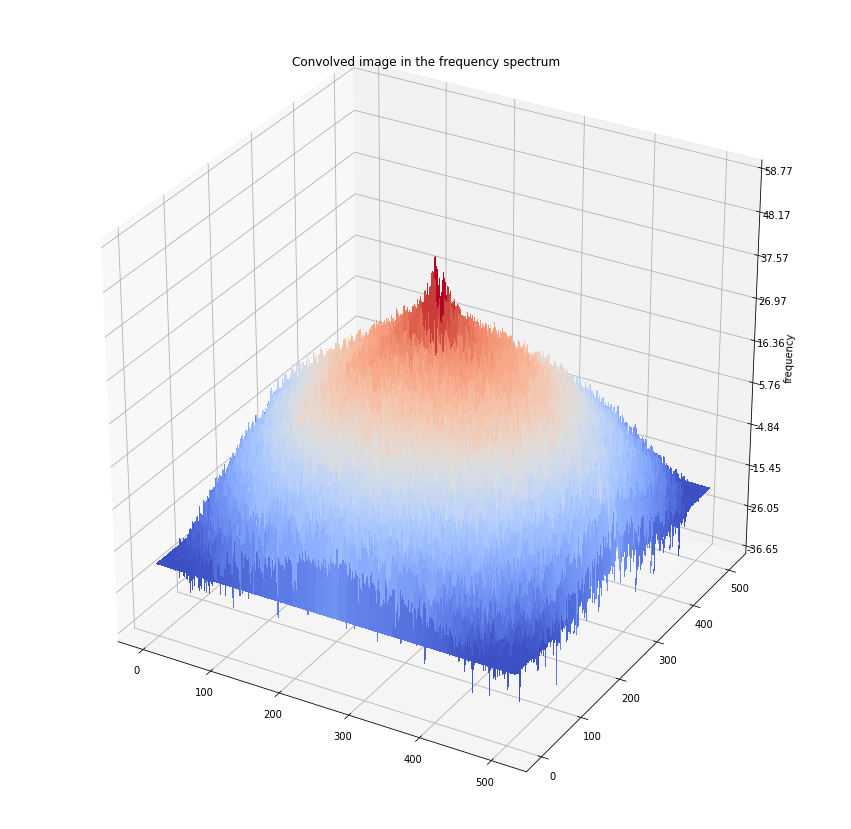

In [12]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
zv = 10 * np.log10(0.01 + fp.fftshift(convolved)).real
surf = ax.plot_surface(xv, yv, zv, linewidth=0, antialiased=False, cmap='coolwarm')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('frequency', size=10)
plt.title('Convolved image in the frequency spectrum'); 

Now for the inverse filter:


In [13]:
eps = 10**-6
freq_kernel = 1 / (eps + freq_kernel)

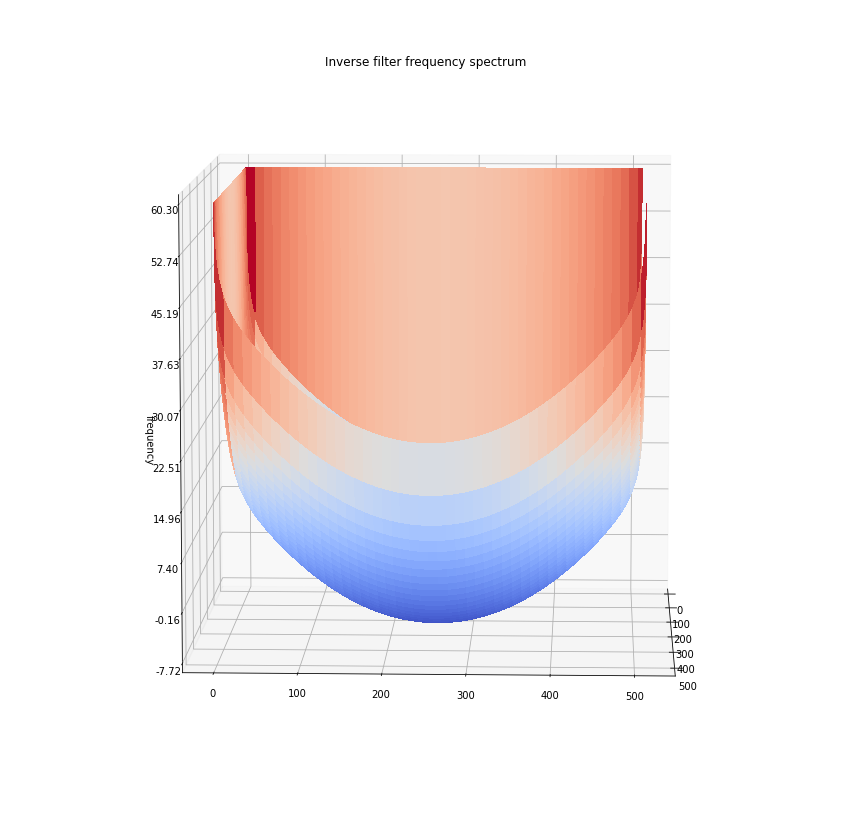

In [14]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
zv = 10 * np.log10(0.01 + fp.fftshift(freq_kernel)).real
surf = ax.plot_surface(xv, yv, zv, linewidth=0, antialiased=False, cmap='coolwarm')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('frequency', size=10)
ax.view_init(elev=08., azim=2)
plt.title('Inverse filter frequency spectrum'); 

In [15]:
convolved = freq * freq_kernel

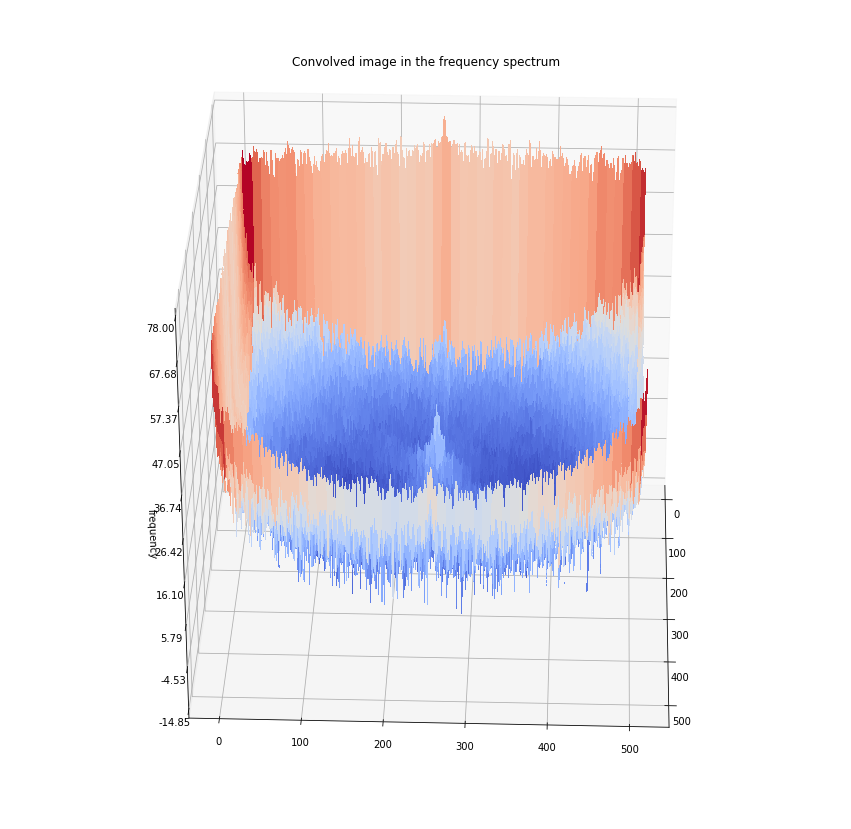

In [16]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
zv = 10 * np.log10(0.01 + fp.fftshift(convolved)).real
surf = ax.plot_surface(xv, yv, zv, linewidth=0, antialiased=False, cmap='coolwarm')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('frequency', size=10)
ax.view_init(azim=2)
plt.title('Convolved image in the frequency spectrum'); 

### 2. Add some random noise to the `lena` image, blur the image with a Gaussian kernel, and then try to restore the image using an inverse filter, as shown in the corresponding example. What happens and why?


In [17]:
lena = rgb2gray(imread(lena_url))

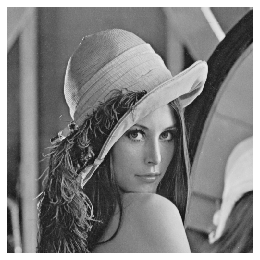

In [18]:
imshow(lena, cmap='gray')
plt.axis('off');

In [19]:
freq = fp.fft2(lena)

Kernel:

In [20]:
kernel = np.outer(signal.gaussian(lena.shape[0], 4), signal.gaussian(lena.shape[1], 4))

In [21]:
freq_kernel = fp.fft2(fp.ifftshift(kernel))

Convolution:

In [22]:
convolved = freq * freq_kernel

Inverse Fourier:

In [23]:
blurred = fp.ifft2(convolved).real
blurred = 255 * blurred / np.max(blurred)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


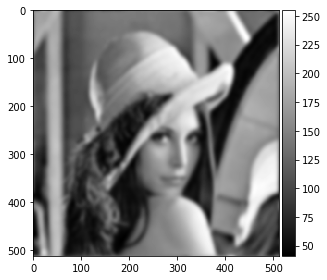

In [24]:
imshow(blurred, cmap='gray');

Inverse filter:

In [25]:
epsilon = 10 ** -6

In [26]:
freq = fp.fft2(blurred)

In [27]:
freq_kernel = 1 / (epsilon + freq_kernel)

In [28]:
convolved = freq * freq_kernel

Restored:

In [29]:
restored = fp.ifft2(convolved).real

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


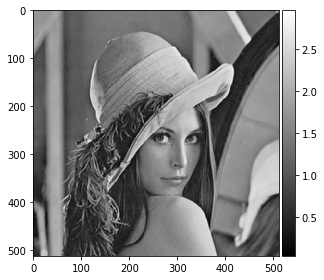

In [30]:
imshow(restored, cmap='gray')

We can see that even though we discard the complex part after the Fourier transform, using an inverse filter we are able to restore the image to a high quality level.


### 3. Use SciPy signal's `fftconvolve()` function to apply a Gaussian blur on a color image in the frequency domain.


In [35]:
from scipy.signal import fftconvolve

In [36]:
?fftconvolve

In [31]:
lena_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

In [33]:
lena = imread(lena_url)

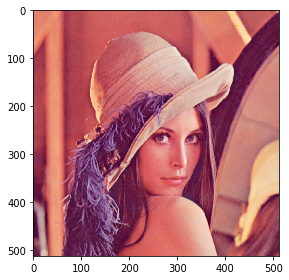

In [34]:
imshow(lena)

In [40]:
kernel = np.outer(signal.gaussian(lena.shape[0], 4), signal.gaussian(lena.shape[1], 4))

In [56]:
lena.shape

(512, 512, 3)

We can perform the convolution in each channel for the image:

In [90]:
blurred = np.zeros(lena.shape)

for channel in range(lena.shape[2]):
    blurred[:, :, channel] = fftconvolve(lena[:, :, channel], kernel, mode='same')


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


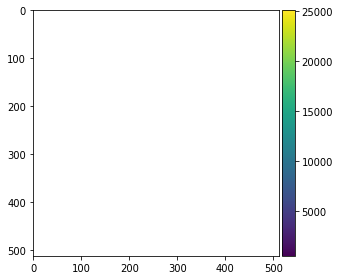

In [135]:
imshow(blurred)

It seems like something went wrong, we can try a direct approach by addin a new axis tot he kernel

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


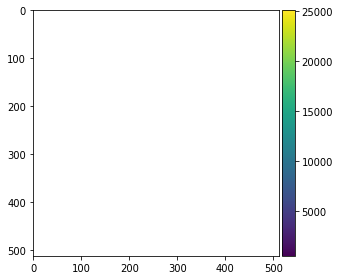

In [93]:
imshow(fftconvolve(lena, kernel[:, :, np.newaxis], mode='same'))

### 4. Use the `fourier_uniform()` and `fourier_ellipsoid()` functions of the `ndimage` module of SciPy to apply LPFs with box and ellipsoid kernels, respectively, on an image in the frequency domain.

In [118]:
import numpy.fft as fp
from scipy.ndimage import fourier_uniform, fourier_ellipsoid

In [115]:
img = lena.mean(axis=2)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


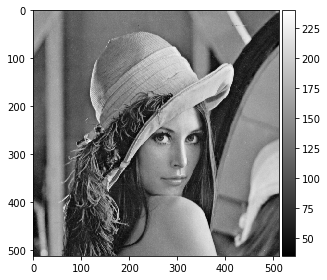

In [117]:
imshow(img, cmap='gray')

In [120]:
freq = fp.fft2(img)

In [129]:
freq_uniform = fourier_uniform(freq, size=50)

In [130]:
im_uniform = fp.ifft2(freq_uniform)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


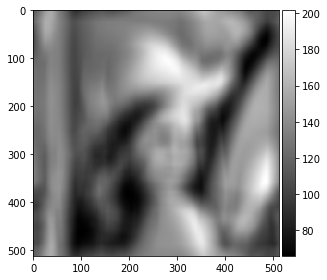

In [131]:
imshow(im_uniform.real, cmap='gray')

In [132]:
freq_ellipsoid = fourier_ellipsoid(freq, size=50)

In [133]:
im_ellipsoid = fp.ifft2(freq_ellipsoid)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


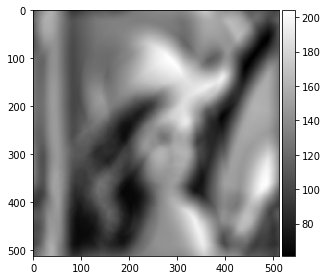

In [134]:
imshow(im_ellipsoid.real, cmap='gray')